In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/SMS YT")

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy   #Language Detection

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from textblob import TextBlob  #Text Break
from sklearn import metrics  #Sk-learn
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
ls

 client_secret.json     'Extract&Clean-YouTube-Comments.ipynb'
 Dataset.csv             ExtractedData.csv
 english_comments.csv    Sentiment_YouTube.ipynb
 extraced_comments.csv


In [ ]:
data = pd.read_csv("Dataset.csv")

In [ ]:
data.head()

,Video ID,Comment ID,comments
0,EqzUcMzfV1w,UgwScEhhjxpfxhw5Bdt4AaABAg,Hey guys I know it is a long one ...
1,EqzUcMzfV1w,UgxGEhGZm1Rf-ssKAhp4AaABAg,Another year another great yearly guide...
2,EqzUcMzfV1w,UgwumVdLibsBdcZuHY54AaABAg,For programmers a new year is incomp...
3,EqzUcMzfV1w,Ugx3SP34sKvs0gfuXmJ4AaABAg,You have no idea how many times I went...
4,EqzUcMzfV1w,UgxFQT5Yg7zieJovgu14AaABAg,Although I'm familiar with alot of the ...


In [ ]:
data.shape

(541, 3)

In [ ]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity
0,EqzUcMzfV1w,UgwScEhhjxpfxhw5Bdt4AaABAg,Hey guys I know it is a long one ...,0.287500
1,EqzUcMzfV1w,UgxGEhGZm1Rf-ssKAhp4AaABAg,Another year another great yearly guide...,0.500000
2,EqzUcMzfV1w,UgwumVdLibsBdcZuHY54AaABAg,For programmers a new year is incomp...,0.151515
3,EqzUcMzfV1w,Ugx3SP34sKvs0gfuXmJ4AaABAg,You have no idea how many times I went...,0.233333
4,EqzUcMzfV1w,UgxFQT5Yg7zieJovgu14AaABAg,Although I'm familiar with alot of the ...,0.276111


## Shuffle the dataset

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data['pol_cat']  = 0

Continuous to categorical

In [ ]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1


In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,EqzUcMzfV1w,Ugz0HJyJa85fThw7s4h4AaABAg,Awesome vid thanks for sharing,0.600000,1
1,EqzUcMzfV1w,UgwCN2xR2JHjUUyXOQ14AaABAg,Excellent overview of FE BE FS devel...,0.400000,1
2,EqzUcMzfV1w,UgyycZY-K8H4tGpa0ph4AaABAg,I'm just a beginner in web dev just st...,0.500000,1
3,EqzUcMzfV1w,UgxuR77isIjq5K4DQ-Z4AaABAg,Going greate buddy,0.000000,-1
4,EqzUcMzfV1w,UgxFQT5Yg7zieJovgu14AaABAg,Although I'm familiar with alot of the ...,0.276111,1


In [ ]:
data['pol_cat'].value_counts()

 1    403
-1    138
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [ ]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [ ]:
data_pos.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,EqzUcMzfV1w,Ugz0HJyJa85fThw7s4h4AaABAg,Awesome vid thanks for sharing,0.600000,1
1,EqzUcMzfV1w,UgwCN2xR2JHjUUyXOQ14AaABAg,Excellent overview of FE BE FS devel...,0.400000,1
2,EqzUcMzfV1w,UgyycZY-K8H4tGpa0ph4AaABAg,I'm just a beginner in web dev just st...,0.500000,1
3,EqzUcMzfV1w,UgxFQT5Yg7zieJovgu14AaABAg,Although I'm familiar with alot of the ...,0.276111,1
4,EqzUcMzfV1w,UgygeN7VQqMGh6-uHEJ4AaABAg,Great video Thanks Do you when the ...,0.466667,1


In [ ]:
data_pos.shape

(403, 5)

In [ ]:
data_neg.shape

(138, 5)

In [ ]:
data_neg['comments'][20]

'UI  Kits    React  antd  is  missing      '

 1    403
-1    138
Name: pol_cat, dtype: int64

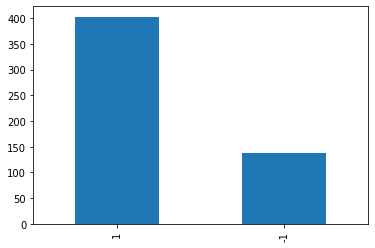

In [ ]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [ ]:
data['comments'] = data['comments'].str.lower()

In [ ]:
data['comments'].head()

0             awesome  vid    thanks  for  sharing    
1    excellent  overview  of  fe  be      fs  devel...
2    i'm  just  a  beginner  in  web  dev  just  st...
3                                 going  greate  buddy
4    although  i'm  familiar  with  alot  of  the  ...
Name: comments, dtype: object

In [ ]:
data.describe()

,polarity,pol_cat
count,541.000000,541.000000
mean,0.268635,0.489834
std,0.263755,0.872623
min,-0.700000,-1.000000
25%,0.000000,-1.000000
50%,0.222222,1.000000
75%,0.460000,1.000000
max,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    541 non-null    object 
 1   Comment ID  541 non-null    object 
 2   comments    541 non-null    object 
 3   polarity    541 non-null    float64
 4   pol_cat     541 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 21.3+ KB


In [ ]:
data['comments'][0]

'awesome  vid    thanks  for  sharing    '

In [ ]:
data['comments'][0].strip()

'awesome  vid    thanks  for  sharing'

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    '''funciton to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set1', 
                collocations=False).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    #plt.show() 
    
    #return fig

Positive Sentiment WordCloud

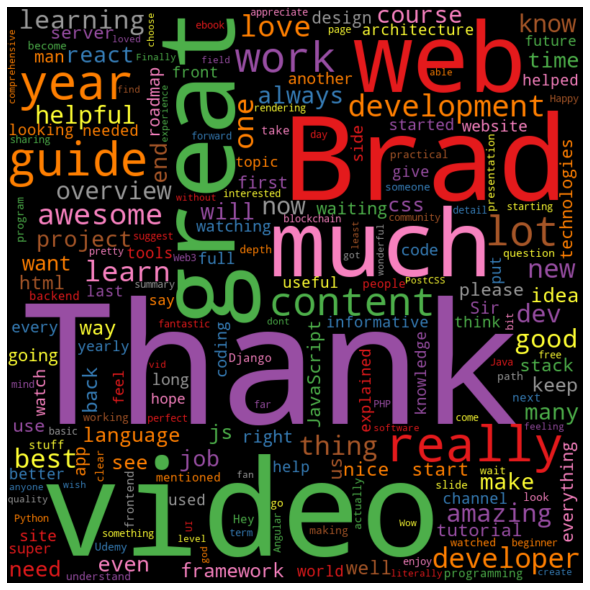

In [ ]:
make_wordcloud(' '.join(data_pos['comments']))
#word_cloud

Negative Sentiment WordCloud

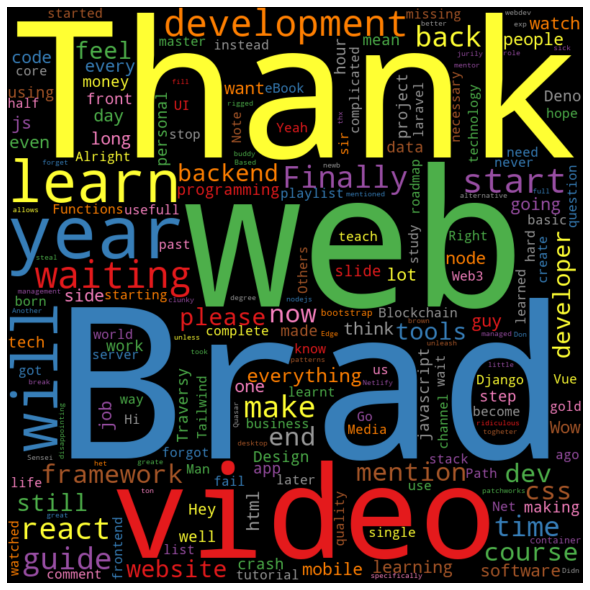

In [ ]:
make_wordcloud(' '.join(data_neg['comments']))

Neutral Sentiment WordCloud

In [ ]:
# make_wordcloud(' '.join(data_neutral['comments']))

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
data['comments'] = data['comments'].str.strip()

In [ ]:
train = data.copy()

In [ ]:
train['comments'] = train['comments'].str.strip()

In [ ]:
train['comments'][0]

'awesome  vid    thanks  for  sharing'

In [ ]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)  #nltk's word_tokenize
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [ ]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,EqzUcMzfV1w,Ugz0HJyJa85fThw7s4h4AaABAg,awesome vid thanks for sharing,0.600000,1,awesome vid thanks sharing
1,EqzUcMzfV1w,UgwCN2xR2JHjUUyXOQ14AaABAg,excellent overview of fe be fs devel...,0.400000,1,excellent overview fe fs development informati...
2,EqzUcMzfV1w,UgyycZY-K8H4tGpa0ph4AaABAg,i'm just a beginner in web dev just st...,0.500000,1,'m beginner web dev started html css gold mine...
3,EqzUcMzfV1w,UgxuR77isIjq5K4DQ-Z4AaABAg,going greate buddy,0.000000,-1,going greate buddy
4,EqzUcMzfV1w,UgxFQT5Yg7zieJovgu14AaABAg,although i'm familiar with alot of the ...,0.276111,1,although 'm familiar alot terms always discour...


In [ ]:
import plotly.express as px 

His = px.histogram(data, 
      x='polarity',
      title='Polarity of YouTube Comments')
His

In [ ]:
data[data.polarity == 1]

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
19,EqzUcMzfV1w,UgwFcpColRWfKnj0vc54AaABAg,ant ui is the best,1.0,1,ant ui best
64,EqzUcMzfV1w,Ugz1dSByRvvcMphnAVx4AaABAg,that's greatest,1.0,1,'s greatest
88,EqzUcMzfV1w,Ugwc37GS_8qAJQvCiy14AaABAg,please what is the best book to lea...,1.0,1,please best book learn javascript
134,EqzUcMzfV1w,UgxmJDllqTQ5KVOEHj94AaABAg,oh awesome i wasn t expecting this,1.0,1,oh awesome expecting
243,EqzUcMzfV1w,UgyoJqe4YcE3wypfIwt4AaABAg,yayyyyy django is one of the best frame...,1.0,1,yayyyyy django one best framework
276,EqzUcMzfV1w,UgxiMtNou3bmjNeMnWt4AaABAg,simply awesome,1.0,1,simply awesome
320,EqzUcMzfV1w,UgwmMgSTWoyb0igxbud4AaABAg,awesome thank you a lot,1.0,1,awesome thank lot
374,EqzUcMzfV1w,UgwGROww_El9ZWZzb6p4AaABAg,excellent video thank u,1.0,1,excellent video thank u
382,EqzUcMzfV1w,UgxO9ty-ogp-1tI6tXt4AaABAg,awesome was looking forward to this,1.0,1,awesome looking forward
395,EqzUcMzfV1w,UgwZPxQfaKyGPD46ZON4AaABAg,looking foward to awesome projects and t...,1.0,1,looking foward awesome projects tutorials fire...


In [ ]:
data[data.polarity <= -0.5]

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
174,EqzUcMzfV1w,UgwTS-WSVENBFTXo-IJ4AaABAg,traversy media still churning out quality...,-0.5,-1,traversy media still churning quality well lai...
373,EqzUcMzfV1w,Ugwt_M-FXXKlPhnobGF4AaABAg,apollo is so buggy and painful,-0.7,-1,apollo buggy painful


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [ ]:
X_train.shape

(432,)

In [ ]:
X_test.shape

(109,)

In [ ]:
data['pol_cat'].value_counts()

 1    403
-1    138
Name: pol_cat, dtype: int64

## Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [ ]:
tf_train.shape

(432, 1531)

### Print the Vocabulary

In [ ]:
print(vect.vocabulary_)

{'wow': 1514, 'amazing': 95, 'roadmap': 1152, 'waiting': 1465, 'ebook': 436, 'excellent': 485, 'video': 1452, 'thank': 1347, 'ta': 1322, 'watching': 1475, 've': 1447, 'decided': 367, 'challenge': 246, 'get': 587, 'intermediate': 729, 'level': 803, 'front': 565, 'end': 444, 'current': 348, 'knowing': 770, 'bare': 164, 'minimum': 894, 'html': 678, 'css': 344, 'like': 807, 'understand': 1419, 'terms': 1343, 'hes': 654, 'using': 1440, 'talking': 1329, 'hard': 634, 'time': 1371, 'thinking': 1357, 'gon': 604, 'na': 917, 'able': 51, 'grasp': 612, 'awesome': 150, 'looking': 833, 'forward': 551, 'ca': 227, 'wait': 1463, 'watch': 1473, 'cheers': 253, 'brad': 207, 'amazingly': 96, 'comprehensive': 293, 'guide': 623, 'web': 1478, 'development': 395, 'landscape': 780, '2022': 22, 'one': 955, 'good': 606, 'resources': 1142, 'topics': 1386, 'mentioned': 873, 'would': 1513, 'really': 1104, 'appreciate': 128, 'thanks': 1349, 'overview': 977, 'useful': 1435, 'well': 1488, 'explained': 495, 'ui': 1415, '

In [ ]:
vocab = vect.vocabulary_

In [ ]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key)

logistic regression classifer is fit on 
the training dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

###  Accuracy score on training dataset

In [ ]:
lr.score(tf_train,y_train)

0.9953703703703703

### Accuracy score on test dataset i.e got from the splitting

In [ ]:
lr.score(tf_test,y_test)

0.7614678899082569

### Make predictions on the test dataset i.e. unseen data to the model

In [ ]:
expected = y_test
predicted = lr.predict(tf_test)

### plot confusion matrix for the test dataset

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install mlxtend

[[69  4]
 [22 14]]


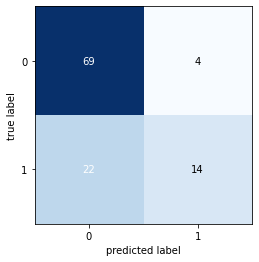

In [ ]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.78      0.39      0.52        36
           1       0.76      0.95      0.84        73

    accuracy                           0.76       109
   macro avg       0.77      0.67      0.68       109
weighted avg       0.76      0.76      0.73       109



### find the F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.6799909665763324